In [266]:
import numpy as np
from datascience import *
import datetime as dt
import pandas as pd

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [336]:
apple = Table.read_table('AAPL (2).csv').where(1, are.not_equal_to('null'))

In [362]:
apple

Date,Open,High,Low,Close,Adj Close,Volume
2016-10-03,112.71,113.05,112.28,112.52,110.57,21701800
2016-10-04,113.06,114.31,112.63,113,111.041,29736800
2016-10-05,113.4,113.66,112.69,113.05,111.09,21453100
2016-10-06,113.7,114.34,113.13,113.89,111.916,28779300
2016-10-07,114.31,114.56,113.51,114.06,112.083,24358400
2016-10-10,115.02,116.75,114.72,116.05,114.038,35826200
2016-10-11,117.7,118.69,116.2,116.3,114.284,64041000
2016-10-12,117.35,117.98,116.75,117.34,115.306,37586800
2016-10-13,116.79,117.44,115.72,116.98,114.952,35192400
2016-10-14,117.88,118.17,117.13,117.63,115.591,35652200


In [338]:
def getDate (date): 
    return int(date[5:7])

In [339]:
# date_data = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in apple.column(0)]
date_data = pd.to_datetime(apple.column(0))

In [340]:
justdates = Table().with_columns("Date", date_data, "High", apple.column(2), "Low", apple.column(3))

In [341]:
justdates

Date,High,Low
2016-10-03 00:00:00,113.05,112.28
2016-10-04 00:00:00,114.31,112.63
2016-10-05 00:00:00,113.66,112.69
2016-10-06 00:00:00,114.34,113.13
2016-10-07 00:00:00,114.56,113.51
2016-10-10 00:00:00,116.75,114.72
2016-10-11 00:00:00,118.69,116.2
2016-10-12 00:00:00,117.98,116.75
2016-10-13 00:00:00,117.44,115.72
2016-10-14 00:00:00,118.17,117.13


In [342]:
# justdates = justdates.with_columns("Median Line", np.median(justdates.column(2)), "Mean Line", np.mean(justdates.column(2)))

In [343]:
differential = np.append([0], np.diff(justdates.column(2)))

In [344]:
double_diff = np.append([0], np.diff(differential))

(array([ 736242.,  736245.,  736248.,  736251.,  736254.,  736257.,
         736260.,  736263.,  736266.]), <a list of 9 Text xticklabel objects>)

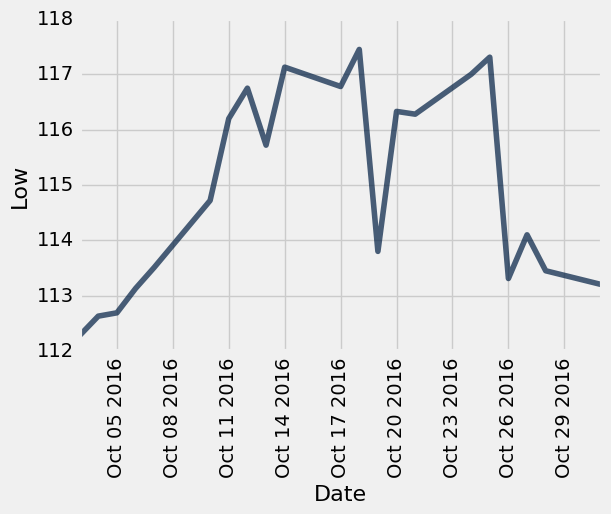

In [345]:
justdates.drop(1).plot(0)

plt.xticks(rotation=90)

In [346]:
diff_table = Table().with_column("date", justdates.column(0), "diff", differential, "abs diff", abs(differential))

In [347]:
diff_table = diff_table.with_columns("Thresh", (max(diff_table.column(2)) - min(diff_table.where(2, are.above(0)).column(2))) / 2)

In [348]:
diff_table.num_rows - diff_table.where(2, are.below(diff_table.column(3).item(0))).num_rows

3

In [349]:
important_dates = diff_table.where(2, are.above(diff_table.column(3).item(0))).select(0)

In [350]:
important_dates = important_dates.join('date', justdates, 'Date')

In [355]:
important_dates

date,High,Low
2016-10-19 00:00:00,117.76,113.8
2016-10-20 00:00:00,117.38,116.33
2016-10-26 00:00:00,115.7,113.31


In [358]:
justdates.show(30)

Date,High,Low
2016-10-03 00:00:00,113.05,112.28
2016-10-04 00:00:00,114.31,112.63
2016-10-05 00:00:00,113.66,112.69
2016-10-06 00:00:00,114.34,113.13
2016-10-07 00:00:00,114.56,113.51
2016-10-10 00:00:00,116.75,114.72
2016-10-11 00:00:00,118.69,116.2
2016-10-12 00:00:00,117.98,116.75
2016-10-13 00:00:00,117.44,115.72
2016-10-14 00:00:00,118.17,117.13


(array([ 736242.,  736245.,  736248.,  736251.,  736254.,  736257.,
         736260.,  736263.,  736266.]), <a list of 9 Text xticklabel objects>)

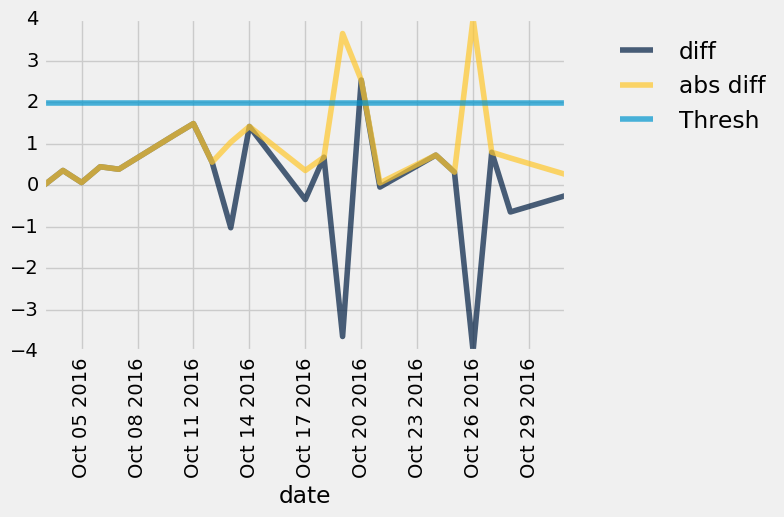

In [351]:
diff_table.plot(0)
plt.xticks(rotation=90)

(array([ 736242.,  736245.,  736248.,  736251.,  736254.,  736257.,
         736260.,  736263.,  736266.]), <a list of 9 Text xticklabel objects>)

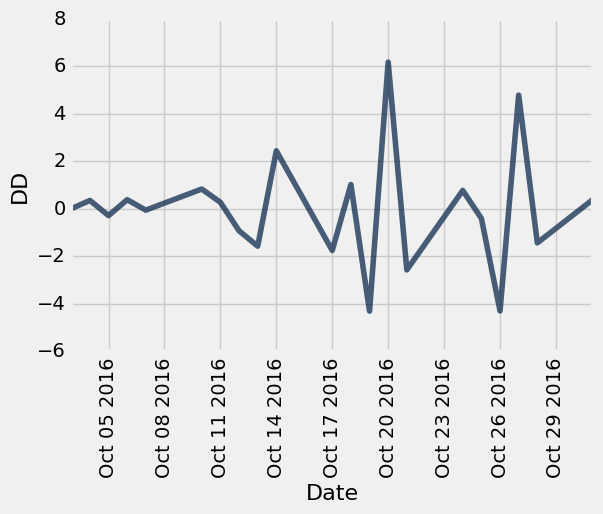

In [352]:
Table().with_columns("Date", justdates.column(0), "DD", double_diff).plot(0)
plt.xticks(rotation=90)

(array([ 736240.,  736243.,  736246.,  736249.,  736252.,  736255.,
         736258.,  736261.,  736264.,  736267.]),
 <a list of 10 Text xticklabel objects>)

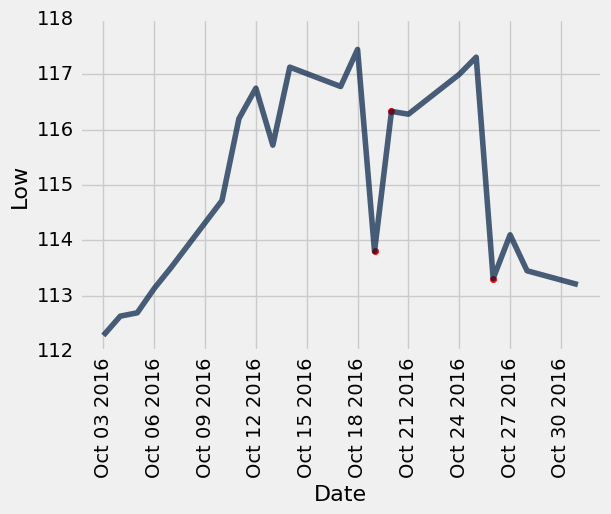

In [359]:
justdates.drop(1, 3, 4).plot(0)
plt.scatter(important_dates.column(0), important_dates.column(2), color = 'red')
plt.xticks(rotation=90)

(array([ 736242.,  736245.,  736248.,  736251.,  736254.,  736257.,
         736260.,  736263.,  736266.]), <a list of 9 Text xticklabel objects>)

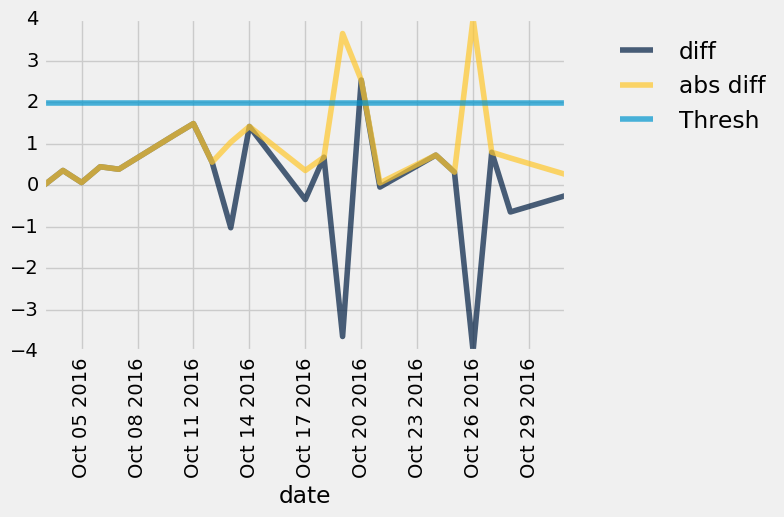

In [360]:
diff_table.plot(0)
plt.xticks(rotation=90)